
 | | |
 |---|---|
 | Schedule: | 23-Nov-2023 |
 | Version: | 1.0 |
 | Course: | Decision Tree|
 | Instructor: |Vineet Kumar Maheshwari|

# Agenda

* Basic concepts
 + Decision Tree
 + Entropy, Information Gain, Gini ratio
* Building classifier
* Model Evaluation
* Challenges e.g. Overfitting
* Rules and Pruning
* Dealing with continuous variables
* Sneak preview into advance topics (next session)
* Quiz

## Pre-requisites

* Python Programming
* Access to python notebook application (Jupyter, Google colab)
* Packages installed:
  + pandas
  + scikit-learn
  + matplotlib
 


# Basic Concepts

* Tree
* Root node
* Leaf node
* Branch
* Decision

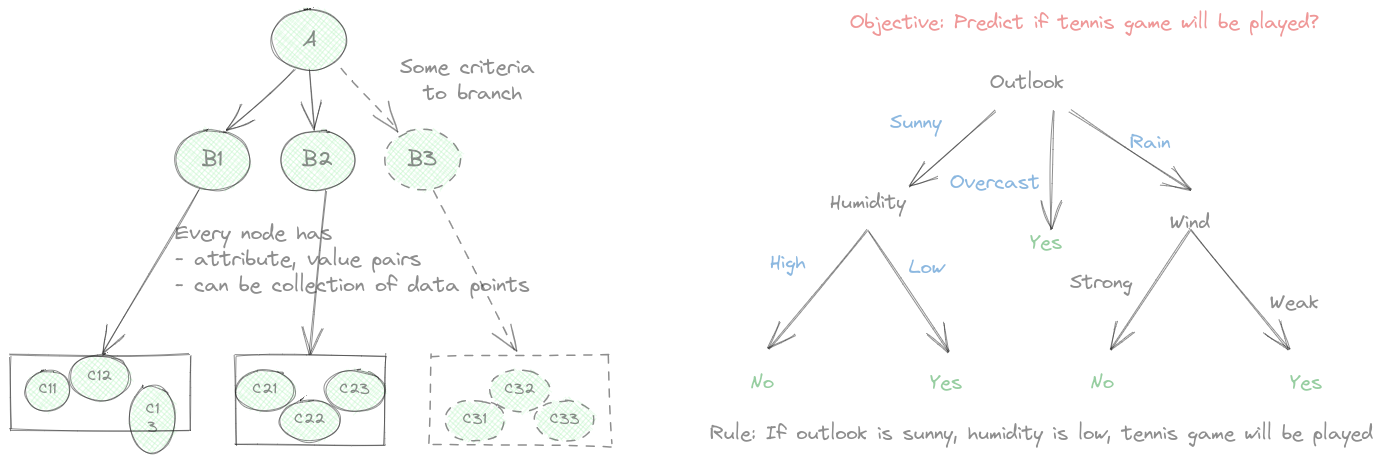

And there can be more than one rule from a tree.

# What else?

Lets map it to programming..

* Every node represents collection of data points capturing same measurable variables
* Every node represents this collection and a feature on which you test a condition (to generate a rule)
* Condition is represented through arrows
* Test results into groups of these data points
* Each group can signify an outcome or we can go further deep with another measurable variable in these sub-groups



# Imports

In [1]:
#!pip install pandas

In [2]:
import pandas as pd
import numpy as np


# Data
This data can be loaded in many ways. Keeping it simple for now to focus on concept.

Here we have:
* 3 features
  + outlook
  + humidity
  + wind
* 7 data points. Also referred as examples, samples

In [3]:
outlook = np.array(["sunny", "sunny", "overcast", "rain", "rain", "rain", "overcast","sunny", "sunny",  "rain", "sunny",  "overcast",  "overcast", "rain"])
humidity = np.array(["high", "high", "high", "high", "normal", "normal", "normal", "high", "normal", "normal", "normal", "high", "normal", "high"])
temperature = np.array(["hot", "hot", "hot", "mild", "cool", "cool", "cool", "mild", "cool", "mild", "mild", "mild", "hot", "mild"])
wind = np.array(["weak","strong",  "weak",  "weak",  "weak", "strong", "strong",  "weak",  "weak",  "weak", "strong", "strong",  "weak",  "strong"])
df = pd.DataFrame({"outlook": outlook, "humidity": humidity, "wind": wind})

In [4]:
df.head()

,outlook,humidity,wind
0,sunny,high,weak
1,sunny,high,strong
2,overcast,high,weak
3,rain,high,weak
4,rain,normal,weak


In [5]:
df.shape

(14, 3)

### We are missing the target variable. What we want to know?

That is whether the tennis game would be played or not? Let us add that.

In [6]:
df['play_game'] = np.array(['No', 'No', 'Yes', 'Yes','Yes', 'No', 'Yes','No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No'])

In [7]:
df.head(15)

,outlook,humidity,wind,play_game
0,sunny,high,weak,No
1,sunny,high,strong,No
2,overcast,high,weak,Yes
3,rain,high,weak,Yes
4,rain,normal,weak,Yes
5,rain,normal,strong,No
6,overcast,normal,strong,Yes
7,sunny,high,weak,No
8,sunny,normal,weak,Yes
9,rain,normal,weak,Yes


In [8]:
df.shape

(14, 4)

### Notes
Above data exactly captures the rules that we had drawn. This may or may not be true in real life. 
For example team decides to go ahead even if it is high humidity on sunny day, if there is strong wind.

Also, there can be other features not considred here which can affect the final play decision.

# Make a decision tree that helps to predict

# But before that.. lets understand some metrics

These are important to evaluate if our model is trained well

## Entropy

* Measures randomness in collection
* Concept taken from physics
* Feature is used to differentiate data into different sample sets, which are subjected for impurity (entropy) calculation
* Randomness mean, classifying a given example taken from a sample set has 50% probability of being certain type (target value).
   + In such cases entropy is 1
   + But if you can classify a given example into particular target value/class more likely, than entropy value reduces
   + This indicates the ability of the given feature to predict in given sample set.
* Formula that helps achieve this measurement
   + 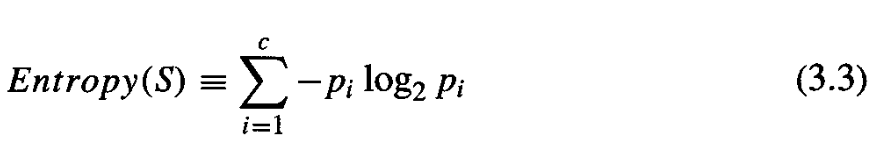
   + where pi is the probability an example in given sample set having specific target value 
   + n is the number of values in target variable
   



![images/dt-with-numbers.png](images/dt-with-numbers.png)

Source: *References [9]*

In [9]:
# Get entroy for given feature selected to differentiate
import math
def get_entropy(sample_set, y, truth_value): # assumes binary classification on target   
    node = {} # node representing partition of examples based on certain value, maps to one branch
    total = sample_set.shape[0]
    positive = sum(sample_set[y] == truth_value) / total # play or not play
    print(f"={y}: {positive }")
    negative = sum(sample_set[y] != truth_value) / total
    print(f"!={y}: {negative}")
    
    entropy = 0
    if positive != 0:
        entropy = -positive  * math.log2(positive)
    if negative != 0:
        entropy = entropy  -negative * math.log2(negative)
    node = {"count": total, "positive": positive, "negative": negative, "class_entropy": entropy}
    return node

### Entropy before we start

In [10]:
get_entropy(df, "play_game", "Yes")

=play_game: 0.6428571428571429
!=play_game: 0.35714285714285715


{'count': 14,
 'positive': 0.6428571428571429,
 'negative': 0.35714285714285715,
 'class_entropy': 0.9402859586706311}

### Entropy for each example set differentiated by "outlook"

In [11]:
tree = [] # childs which is tuple of edge and node
tree.append({"class": "sunny", "stats": get_entropy(df[df["outlook"] == "sunny"], "play_game", "Yes")})
tree

=play_game: 0.4
!=play_game: 0.6


[{'class': 'sunny',
  'stats': {'count': 5,
   'positive': 0.4,
   'negative': 0.6,
   'class_entropy': 0.9709505944546686}}]

In [12]:
tree.append({"class": "rain", "stats": get_entropy(df[df["outlook"] == "rain"], "play_game", "Yes")})
tree

=play_game: 0.6
!=play_game: 0.4


[{'class': 'sunny',
  'stats': {'count': 5,
   'positive': 0.4,
   'negative': 0.6,
   'class_entropy': 0.9709505944546686}},
 {'class': 'rain',
  'stats': {'count': 5,
   'positive': 0.6,
   'negative': 0.4,
   'class_entropy': 0.9709505944546686}}]

In [13]:
tree.append({"class": "overcast", "stats": get_entropy(df[df["outlook"] == "overcast"], "play_game", "Yes")})
tree

=play_game: 1.0
!=play_game: 0.0


[{'class': 'sunny',
  'stats': {'count': 5,
   'positive': 0.4,
   'negative': 0.6,
   'class_entropy': 0.9709505944546686}},
 {'class': 'rain',
  'stats': {'count': 5,
   'positive': 0.6,
   'negative': 0.4,
   'class_entropy': 0.9709505944546686}},
 {'class': 'overcast',
  'stats': {'count': 4,
   'positive': 1.0,
   'negative': 0.0,
   'class_entropy': -0.0}}]

### Lets put this together


In [14]:
def calculate_classifier_entropy(data, feature):
    children = []
    total = data.shape[0]
    print(f"Total: {total}")
    values_it_can_take = pd.unique(data[feature])
    for value in values_it_can_take:
        children.append({ "class": value, "stats": get_entropy(data[data[feature] == value], "play_game", "Yes"), "data": data[data[feature] == value]})
    feature_classification_entropy = 0
    for child in children:
        ratio = child['stats']['count'] / total
        feature_classification_entropy += ratio * child['stats']['class_entropy']
    return {"feature" : feature, "feature_entropy": feature_classification_entropy, "children": children}
calculate_classifier_entropy(df, "outlook")

Total: 14
=play_game: 0.4
!=play_game: 0.6
=play_game: 1.0
!=play_game: 0.0
=play_game: 0.6
!=play_game: 0.4


{'feature': 'outlook',
 'feature_entropy': 0.6935361388961918,
 'children': [{'class': 'sunny',
   'stats': {'count': 5,
    'positive': 0.4,
    'negative': 0.6,
    'class_entropy': 0.9709505944546686},
   'data':    outlook humidity    wind play_game
   0    sunny     high    weak        No
   1    sunny     high  strong        No
   7    sunny     high    weak        No
   8    sunny   normal    weak       Yes
   10   sunny   normal  strong       Yes},
  {'class': 'overcast',
   'stats': {'count': 4,
    'positive': 1.0,
    'negative': 0.0,
    'class_entropy': -0.0},
   'data':      outlook humidity    wind play_game
   2   overcast     high    weak       Yes
   6   overcast   normal  strong       Yes
   11  overcast     high  strong       Yes
   12  overcast   normal    weak       Yes},
  {'class': 'rain',
   'stats': {'count': 5,
    'positive': 0.6,
    'negative': 0.4,
    'class_entropy': 0.9709505944546686},
   'data':    outlook humidity    wind play_game
   3     rain    

### Let us find which feature provides best entropy reduction here

In [15]:
calculate_classifier_entropy(df, "humidity")

Total: 14
=play_game: 0.42857142857142855
!=play_game: 0.5714285714285714
=play_game: 0.8571428571428571
!=play_game: 0.14285714285714285


{'feature': 'humidity',
 'feature_entropy': 0.7884504573082896,
 'children': [{'class': 'high',
   'stats': {'count': 7,
    'positive': 0.42857142857142855,
    'negative': 0.5714285714285714,
    'class_entropy': 0.9852281360342515},
   'data':      outlook humidity    wind play_game
   0      sunny     high    weak        No
   1      sunny     high  strong        No
   2   overcast     high    weak       Yes
   3       rain     high    weak       Yes
   7      sunny     high    weak        No
   11  overcast     high  strong       Yes
   13      rain     high  strong        No},
  {'class': 'normal',
   'stats': {'count': 7,
    'positive': 0.8571428571428571,
    'negative': 0.14285714285714285,
    'class_entropy': 0.5916727785823275},
   'data':      outlook humidity    wind play_game
   4       rain   normal    weak       Yes
   5       rain   normal  strong        No
   6   overcast   normal  strong       Yes
   8      sunny   normal    weak       Yes
   9       rain   normal 

In [16]:
calculate_classifier_entropy(df, "wind")

Total: 14
=play_game: 0.75
!=play_game: 0.25
=play_game: 0.5
!=play_game: 0.5


{'feature': 'wind',
 'feature_entropy': 0.8921589282623617,
 'children': [{'class': 'weak',
   'stats': {'count': 8,
    'positive': 0.75,
    'negative': 0.25,
    'class_entropy': 0.8112781244591328},
   'data':      outlook humidity  wind play_game
   0      sunny     high  weak        No
   2   overcast     high  weak       Yes
   3       rain     high  weak       Yes
   4       rain   normal  weak       Yes
   7      sunny     high  weak        No
   8      sunny   normal  weak       Yes
   9       rain   normal  weak       Yes
   12  overcast   normal  weak       Yes},
  {'class': 'strong',
   'stats': {'count': 6,
    'positive': 0.5,
    'negative': 0.5,
    'class_entropy': 1.0},
   'data':      outlook humidity    wind play_game
   1      sunny     high  strong        No
   5       rain   normal  strong        No
   6   overcast   normal  strong       Yes
   10     sunny   normal  strong       Yes
   11  overcast     high  strong       Yes
   13      rain     high  strong    

### We can see the difference between the entropy at the start and after using differentiating feature "outloook"

#### clearly we have "outlook" as the best feature to be kept at root

### All that is good, but how do we create this tree?

![images/tree-of-trees.png](images/tree-of-trees.png)
Source: *Reference[3]*

In [17]:
# data structure:
# branch, (entropy for given node, branch, 
tree = {"root": get_entropy(df, "play_game", "Yes"), "feature_junction" : [calculate_classifier_entropy(df, "outlook"),
                                                                       calculate_classifier_entropy(df, "humidity"),
                                                                       calculate_classifier_entropy(df, "wind")]} # root node
tree

=play_game: 0.6428571428571429
!=play_game: 0.35714285714285715
Total: 14
=play_game: 0.4
!=play_game: 0.6
=play_game: 1.0
!=play_game: 0.0
=play_game: 0.6
!=play_game: 0.4
Total: 14
=play_game: 0.42857142857142855
!=play_game: 0.5714285714285714
=play_game: 0.8571428571428571
!=play_game: 0.14285714285714285
Total: 14
=play_game: 0.75
!=play_game: 0.25
=play_game: 0.5
!=play_game: 0.5


{'root': {'count': 14,
  'positive': 0.6428571428571429,
  'negative': 0.35714285714285715,
  'class_entropy': 0.9402859586706311},
 'feature_junction': [{'feature': 'outlook',
   'feature_entropy': 0.6935361388961918,
   'children': [{'class': 'sunny',
     'stats': {'count': 5,
      'positive': 0.4,
      'negative': 0.6,
      'class_entropy': 0.9709505944546686},
     'data':    outlook humidity    wind play_game
     0    sunny     high    weak        No
     1    sunny     high  strong        No
     7    sunny     high    weak        No
     8    sunny   normal    weak       Yes
     10   sunny   normal  strong       Yes},
    {'class': 'overcast',
     'stats': {'count': 4,
      'positive': 1.0,
      'negative': 0.0,
      'class_entropy': -0.0},
     'data':      outlook humidity    wind play_game
     2   overcast     high    weak       Yes
     6   overcast   normal  strong       Yes
     11  overcast     high  strong       Yes
     12  overcast   normal    weak       Yes

## Information gain

* As we move through the tree further deep, how much is the entropy reduced, is referred as Information gain.
* Randomness implies zero information
* "Given entropy as a measure of the impurity in a collection of training examples, we can now define a **measure of the effectiveness of an attribute in classifying the training data**. The measure we will use, called information gain, is simply the **expected reduction in entropy caused by partitioning the examples according to this attribute**." [3]

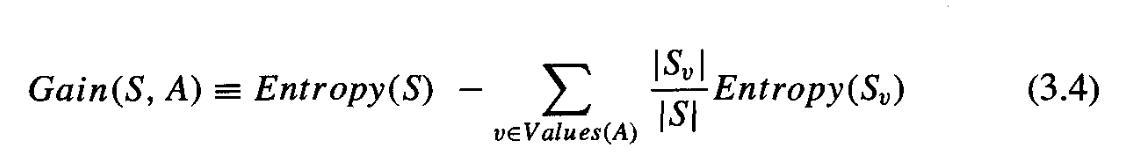


In [18]:
info_gain = tree['root']['class_entropy'] - tree['feature_junction'][0]['feature_entropy'] # 0 is for feature = outlook
info_gain

0.24674981977443933

In [19]:
info_gain = tree['root']['class_entropy'] - tree['feature_junction'][1]['feature_entropy'] # 0 is for feature = humidity
info_gain

0.15183550136234159

In [20]:
info_gain = tree['root']['class_entropy'] - tree['feature_junction'][2]['feature_entropy'] # 0 is for feature = humidity
info_gain

0.04812703040826949

## Lets select "sunny" case for "outlook" feature and create another branch

In [21]:
info_gain = tree['root']['class_entropy'] - tree['feature_junction'][2]['feature_entropy'] # 0 is for feature = humidity
info_gain

0.04812703040826949

In [22]:
#tree[1][1][1][0][1]['entropy']

In [23]:
children_root = tree['feature_junction'][0]['children']
sunny_node = children_root[0] # lets go with first decision branch: sunny

In [24]:
subset = sunny_node['data']
subset

,outlook,humidity,wind,play_game
0,sunny,high,weak,No
1,sunny,high,strong,No
7,sunny,high,weak,No
8,sunny,normal,weak,Yes
10,sunny,normal,strong,Yes


In [25]:
node_attrs = sunny_node['stats']
parent_node_entropy = node_attrs['class_entropy']
childs_wind = calculate_classifier_entropy(sunny_node['data'], "wind")
parent_node_entropy - childs_wind['feature_entropy'], childs_wind

Total: 5
=play_game: 0.3333333333333333
!=play_game: 0.6666666666666666
=play_game: 0.5
!=play_game: 0.5


(0.01997309402197489,
 {'feature': 'wind',
  'feature_entropy': 0.9509775004326937,
  'children': [{'class': 'weak',
    'stats': {'count': 3,
     'positive': 0.3333333333333333,
     'negative': 0.6666666666666666,
     'class_entropy': 0.9182958340544896},
    'data':   outlook humidity  wind play_game
    0   sunny     high  weak        No
    7   sunny     high  weak        No
    8   sunny   normal  weak       Yes},
   {'class': 'strong',
    'stats': {'count': 2,
     'positive': 0.5,
     'negative': 0.5,
     'class_entropy': 1.0},
    'data':    outlook humidity    wind play_game
    1    sunny     high  strong        No
    10   sunny   normal  strong       Yes}]})

In [26]:
childs_humidity = calculate_classifier_entropy(sunny_node['data'], "humidity")
parent_node_entropy - childs_humidity['feature_entropy'], childs_humidity

Total: 5
=play_game: 0.0
!=play_game: 1.0
=play_game: 1.0
!=play_game: 0.0


(0.9709505944546686,
 {'feature': 'humidity',
  'feature_entropy': 0.0,
  'children': [{'class': 'high',
    'stats': {'count': 3,
     'positive': 0.0,
     'negative': 1.0,
     'class_entropy': 0.0},
    'data':   outlook humidity    wind play_game
    0   sunny     high    weak        No
    1   sunny     high  strong        No
    7   sunny     high    weak        No},
   {'class': 'normal',
    'stats': {'count': 2,
     'positive': 1.0,
     'negative': 0.0,
     'class_entropy': -0.0},
    'data':    outlook humidity    wind play_game
    8    sunny   normal    weak       Yes
    10   sunny   normal  strong       Yes}]})

### With 'humidity' feature, we get minimal entropy (0). Hence maximum gain. Therefore at this junction, we select is feature = humidity

In [27]:
# So modify sunny node to capture branch and the children for this branch
#sunny_node = (sunny_node, "humidity", childs_humidity)
sunny_node['feature_junction'] = [childs_wind, childs_humidity]
tree

{'root': {'count': 14,
  'positive': 0.6428571428571429,
  'negative': 0.35714285714285715,
  'class_entropy': 0.9402859586706311},
 'feature_junction': [{'feature': 'outlook',
   'feature_entropy': 0.6935361388961918,
   'children': [{'class': 'sunny',
     'stats': {'count': 5,
      'positive': 0.4,
      'negative': 0.6,
      'class_entropy': 0.9709505944546686},
     'data':    outlook humidity    wind play_game
     0    sunny     high    weak        No
     1    sunny     high  strong        No
     7    sunny     high    weak        No
     8    sunny   normal    weak       Yes
     10   sunny   normal  strong       Yes,
     'feature_junction': [{'feature': 'wind',
       'feature_entropy': 0.9509775004326937,
       'children': [{'class': 'weak',
         'stats': {'count': 3,
          'positive': 0.3333333333333333,
          'negative': 0.6666666666666666,
          'class_entropy': 0.9182958340544896},
         'data':   outlook humidity  wind play_game
         0   sunn

### By now concept should have been clear 

* This can be further automated. You may want to test your programming skills
* Or easier way is to use the ready to use function available from scikit-learn for decition_tree_classifier

#### Here is snapshot of ID3 algorithm

![ID3 Algo](images/id3-algo.png)

---

### But lets finish Gini measure, What is it?

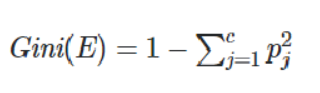

* It is similar to Entropy, with only difference of computational efficiency as evident from formula
* Values for the two impurity metrics vary as following [4]

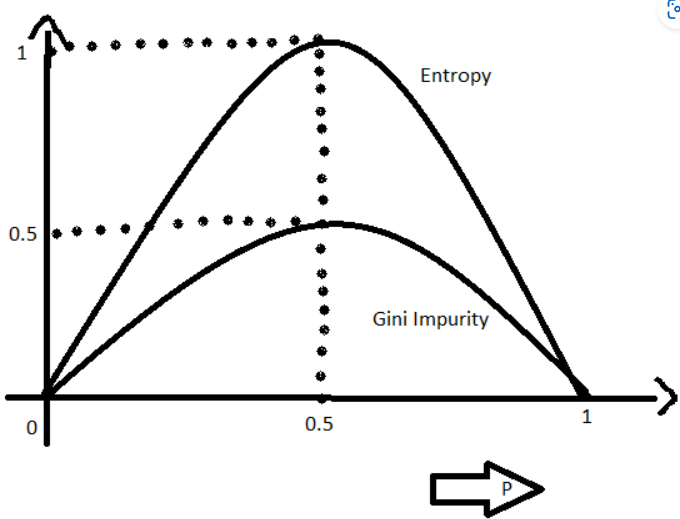


#### What about Gain Ratio?

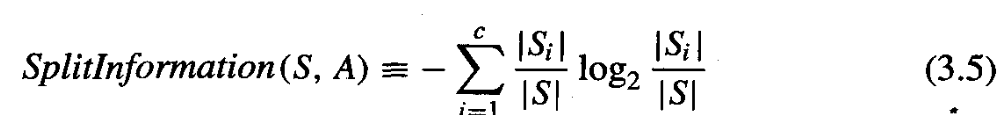

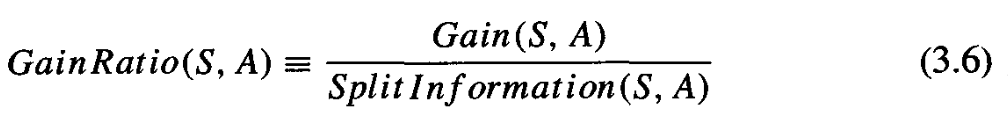

In [28]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [29]:
X = df.values[:, :3] 
Y = df.values[:, 3] 

In [30]:
dt_classifier="entropy"

In [31]:
X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.3, random_state = 41) 

In [32]:
gini_based_model = DecisionTreeClassifier(criterion = dt_classifier, 
            random_state = 41, max_depth=3, min_samples_leaf=2)
gini_based_model.fit(X_train, y_train) 

ValueError: could not convert string to float: 'overcast'

### What is the issue here?

These functions can't work with strings. We need to do One Hot Encoding. This is part of the work we generally do to shape our data - Feature Engineering

So, what does it mean:
* if you have possible values for a feature: "sunny", "rain", "overcast"
* One hot encoding would convert this into 2 feature columns: "sunny", "rain"
* These columns can take 0 or 1 value and if both are 0 it would imply overcast

In [33]:
from sklearn.preprocessing import OneHotEncoder 

In [34]:
enc = OneHotEncoder(handle_unknown='ignore')
X_mod = enc.fit_transform(X).toarray()
X_mod

array([[0., 0., 1., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0.]])

In [35]:
Y_mod = [1 if y == "Yes" else 0 for y in Y]
Y, Y_mod

(array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
        'Yes', 'Yes', 'Yes', 'No'], dtype=object),
 [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [36]:
X_train, X_test, y_train, y_test = train_test_split(  
    X_mod, Y_mod, test_size = 0.3, random_state = 41) 

In [37]:
gini_based_model = DecisionTreeClassifier(criterion = dt_classifier, 
            random_state = 41, max_depth=3, min_samples_leaf=2)
gini_based_model.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       random_state=41)

In [38]:
y_pred = gini_based_model.predict(X_test) 
print(y_pred)

[1 1 1 0 1]


In [39]:
confusion_matrix(y_test, y_pred)

array([[0, 1],
       [1, 3]])

In [40]:
accuracy_score(y_test,y_pred)*100

60.0

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      0.75      0.75         4

    accuracy                           0.60         5
   macro avg       0.38      0.38      0.38         5
weighted avg       0.60      0.60      0.60         5



## Let us add more information to our data
### We had got temperature feature also, lets see if that helps

In [42]:
X = np.column_stack([df.values[:, :3], temperature]) #added temperature variable
X

array([['sunny', 'high', 'weak', 'hot'],
       ['sunny', 'high', 'strong', 'hot'],
       ['overcast', 'high', 'weak', 'hot'],
       ['rain', 'high', 'weak', 'mild'],
       ['rain', 'normal', 'weak', 'cool'],
       ['rain', 'normal', 'strong', 'cool'],
       ['overcast', 'normal', 'strong', 'cool'],
       ['sunny', 'high', 'weak', 'mild'],
       ['sunny', 'normal', 'weak', 'cool'],
       ['rain', 'normal', 'weak', 'mild'],
       ['sunny', 'normal', 'strong', 'mild'],
       ['overcast', 'high', 'strong', 'mild'],
       ['overcast', 'normal', 'weak', 'hot'],
       ['rain', 'high', 'strong', 'mild']], dtype=object)

In [43]:
enc = OneHotEncoder(handle_unknown='ignore')
X_mod = enc.fit_transform(X).toarray()
X_mod

array([[0., 0., 1., 1., 0., 0., 1., 0., 1., 0.],
       [0., 0., 1., 1., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 1., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1., 1., 0., 1., 0., 0.],
       [0., 0., 1., 1., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 1., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0., 1.]])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(  
    X_mod, Y_mod, test_size = 0.3, random_state = 41) 

In [45]:
gini_based_model = DecisionTreeClassifier(criterion = dt_classifier, 
            random_state = 41, max_depth=4, min_samples_leaf=2)
gini_based_model.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=2,
                       random_state=41)

In [46]:
y_pred = gini_based_model.predict(X_test) 
print(y_pred)

[1 0 1 1 0]


In [47]:
confusion_matrix(y_test, y_pred)

array([[0, 1],
       [2, 2]])

In [48]:
accuracy_score(y_test,y_pred)*100

40.0

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.50      0.57         4

    accuracy                           0.40         5
   macro avg       0.33      0.25      0.29         5
weighted avg       0.53      0.40      0.46         5



![Decision boundary - 1](images/decision-boundary-1.png)

![Decision boundary - 2](images/decision-boundary-2.png)

![Decision boundary - 3](images/decision-boundary-3.png)


Source: *References [8]*

### What are the issues with Decision Trees?

* Overfitting of data
  + You can go to greater depth of tree, which virtually fits the whole of training data
  + Becomes an issue if there is noise in training data
  + Or number of samples is less which can characterise the real world
  
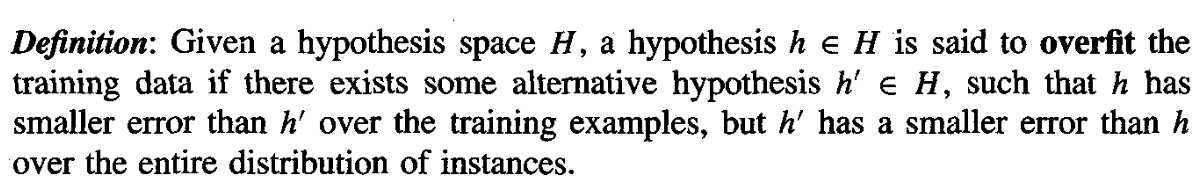

How train and test accuracy vary with overfitting?

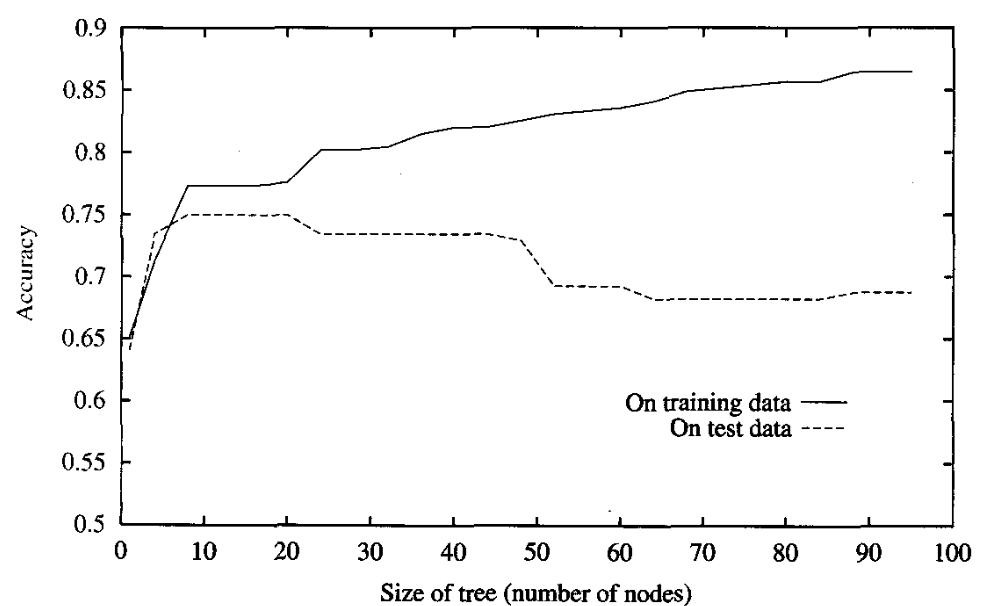

### Solving for overfitting

#### Reduced Error Pruning (Quinlan 1987)
* consider each of the decision nodes in the.tree to be candidates for pruning
* Pruning a decision node consists of removing the subtree rooted at that node, making it a leaf node, and assigning it the most common classification of the training examples affiliated with that node.
* Nodes are removed only if the resulting pruned tree performs no worse than-theoriginal over the validation set.



#### Rule post pruning

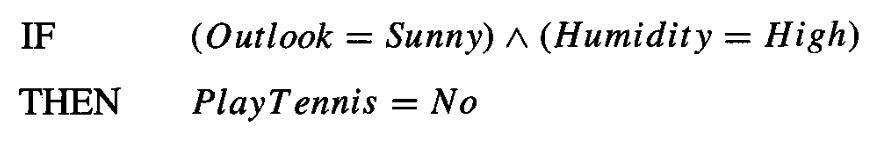

In above rule definition:
* It is generated by following from root till the leaf
* Every pre-condition is evaluated for purning if it does not worsens the accuracy (validation)
* Converting to rules help make the processing simpler

## What about continuous values?

* We would need to divide them into bins, using different strategies depending on data
* This is done for both features and target function
* We have a challenge while doing this and it complicates decision tree: 
  - What is appropriate threshold value to divide data points into various categories for a feature

### Missing values

This is part of featuer engineering

Use one of following as per feature characteristics

* most frequently occurring value for feature
* mean value for the feature
* median value for the feature
* min or max value (unlikely)
* too many missing values for features in a data point, eliminate it
* mean from the neighboring candidates


# Useful references

||||
|---|---|---|
|1. | Programming example | https://www.w3schools.com/python/python_ml_decision_tree.asp |
|2. | Another example | https://www.geeksforgeeks.org/decision-tree-implementation-python/ |
|3. | Text book | Machine Learning, Tom M. Mitchell, Chapter 3, Page 52 |
|4. | Impurity metrics | https://www.geeksforgeeks.org/gini-impurity-and-entropy-in-decision-tree-ml/ |
|5. | DT Algorithms (includes various variants) | https://www.geeksforgeeks.org/decision-tree-algorithms/ |
|6. | Code for ID3 | https://www.kaggle.com/code/ankitmalik/decision-trees-from-scratch-id3 |
|7. | Reference code for OHE| https://datagy.io/sklearn-one-hot-encode/ |
|8. | Decision boundary | https://medium.com/analytics-vidhya/decision-boundary-for-classifiers-an-introduction-cc67c6d3da0e |
|9. | Entropy and Information gain | https://medium.com/codex/decision-tree-for-classification-entropy-and-information-gain-cd9f99a26e0d |

